In [64]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt

# ML Zoomcamp 2023 - Homework #2

In [65]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-21 15:53:51--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2023-09-21 15:53:51 (20.6 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [66]:
import pandas as pd

In [67]:
housing = pd.read_csv("housing.csv")

In [68]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Question 1

In [69]:
for column in housing.columns:
  if housing[column].isna().values.any():
    print(column)

total_bedrooms


## Question 2

In [70]:
housing['population'].median()

1166.0

## Question 3

## Prepare and split the dataset

In [71]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [72]:
# Convert categorical feature into dummy (Feature Engineering)

housing_edited = pd.get_dummies(housing, columns=['ocean_proximity'])

In [73]:
import numpy as np

np.random.seed(42)

n = len(housing_edited)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = housing_edited.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

### Validation Framework

In [74]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Linear Regression

In [75]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [76]:
base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN']

In [77]:
def prepare_X_zero(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [78]:
def prepare_X_mean(df):
    df_num = df[base]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

### Baseline solution (Fill with Zero)

In [79]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [81]:
X_train = prepare_X_zero(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [82]:
y_pred = w_0 + X_train.dot(w)

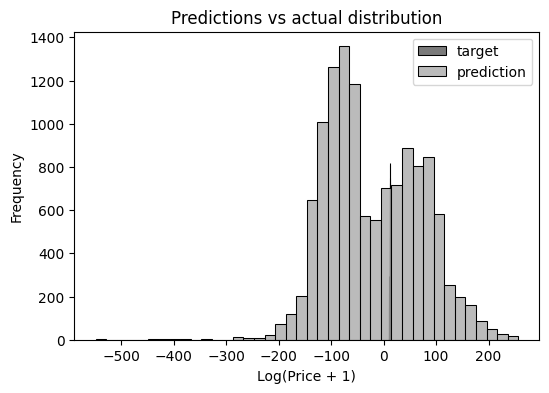

In [83]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [84]:
# Use the validation dataset to evaluate the models and compare the RMSE of each option.
rmse(y_train, y_pred)

95.19997152800337

### Baseline solution (Fill with mean)

In [85]:
X_train = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [86]:
y_pred = w_0 + X_train.dot(w)

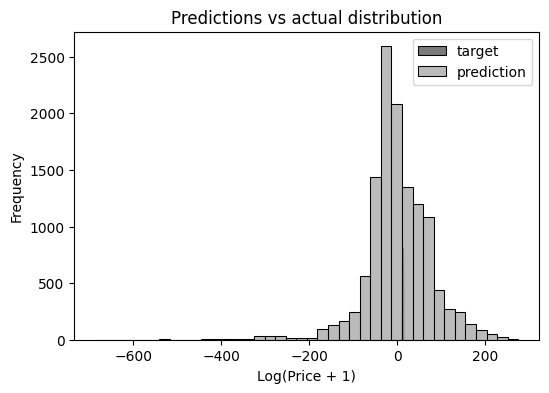

In [87]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [88]:
# Use the validation dataset to evaluate the models and compare the RMSE of each option.
rmse(y_train, y_pred)

74.64411948211631

### Conclusion

Mean yielding better RMSE score than fill with zero

## Question 4

In [92]:
# fill empty data with zero
X_train = prepare_X_zero(df_train)

# create regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [93]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[-1], w[-1]))

    0, -12874.69, -609.74, -609.74
1e-06, -1.61, -0.41, -0.41
0.0001, -1.60, -0.41, -0.41
0.001, -1.60, -0.41, -0.41
 0.01, -1.57, -0.41, -0.41
  0.1, -1.31, -0.35, -0.35
    1, -0.50, -0.16, -0.16
    5, -0.14, -0.02, -0.02
   10, -0.07, 0.01, 0.01


In [102]:
# Which r gives the best RMSE?

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
  print('r: ', r)
  X_train = prepare_X_zero(df_train)
  w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

  X_val = prepare_X_zero(df_val)
  y_pred = w_0 + X_val.dot(w)
  print('validation:', round(rmse(y_val, y_pred),2))

  X_test = prepare_X_zero(df_test)
  y_pred = w_0 + X_test.dot(w)
  print('test:', round(rmse(y_test, y_pred),2))



r:  0
validation: 96.83
test: 95.81
r:  1e-06
validation: 0.32
test: 0.34
r:  0.0001
validation: 0.32
test: 0.34
r:  0.001
validation: 0.32
test: 0.34
r:  0.01
validation: 0.32
test: 0.34
r:  0.1
validation: 0.32
test: 0.34
r:  1
validation: 0.32
test: 0.34
r:  5
validation: 0.32
test: 0.34
r:  10
validation: 0.32
test: 0.34


Best r based on rmse = 1e-06 (0.000001)

## Question 5

In [118]:
from numpy.linalg import LinAlgError

In [121]:
def train_linear_regression_reg_2(X, y, r=0.0):
  """Trains a linear regression model with regularization.

  Args:
    X: A numpy array of shape (n_samples, n_features).
    y: A numpy array of shape (n_samples,).
    r: The regularization parameter.

  Returns:
    A tuple of (w0, w), where w0 is the intercept and w is the vector of
    coefficients.
  """

  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  reg = r * np.eye(XTX.shape[0])
  XTX = XTX + reg

  try:
    XTX_inv = np.linalg.inv(XTX)
  except LinAlgError:
    # If the matrix is singular, add a small amount of noise to it.
    XTX += np.random.randn(*XTX.shape) * 1e-6
    XTX_inv = np.linalg.inv(XTX)

  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]

In [131]:
rmse_list = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  print("seed: ", seed)
  np.random.seed(seed)

  n = len(housing_edited)

  n_val = int(0.2 * n)
  n_test = int(0.2 * n)
  n_train = n - (n_val + n_test)

  idx = np.arange(n)
  np.random.shuffle(idx)

  df_shuffled = housing_edited.iloc[idx]

  df_train = df_shuffled.iloc[:n_train].copy()
  df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
  df_test = df_shuffled.iloc[n_train+n_val:].copy()

  y_train_orig = df_train.median_house_value.values
  y_val_orig = df_val.median_house_value.values
  y_test_orig = df_test.median_house_value.values

  y_train = np.log1p(df_train.median_house_value.values)
  y_val = np.log1p(df_val.median_house_value.values)
  y_test = np.log1p(df_test.median_house_value.values)

  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']

  X_train = prepare_X_zero(df_train)
  w_0, w = train_linear_regression_reg_2(X_train, y_train)

  X_val = prepare_X_zero(df_val)
  y_pred = w_0 + X_val.dot(w)

  rmse_value = round(rmse(y_val, y_pred),3)
  rmse_list.append(rmse_value)
  print('validation:', rmse_value)

  # X_test = prepare_X_zero(df_test)
  # y_pred = w_0 + X_test.dot(w)
  # print('test:', round(rmse(y_test, y_pred),2))

seed:  0
validation: 10.672
seed:  1
validation: 44.729
seed:  2
validation: 10.406
seed:  3
validation: 137.476
seed:  4
validation: 34.391
seed:  5
validation: 1057.948
seed:  6
validation: 28.717
seed:  7
validation: 0.329
seed:  8
validation: 0.334
seed:  9
validation: 56.221


In [132]:
round(np.std(rmse_list, dtype=np.float64), 3)

308.993

## Question 6

In [134]:
np.random.seed(9)

n = len(housing_edited)

n_test = int(0.2 * n)
n_train_val = n - (n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = housing_edited.iloc[idx]

df_train_val = df_shuffled.iloc[:n_train_val].copy()
df_test = df_shuffled.iloc[n_train_val:].copy()

y_train_val_orig = df_train_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train_val = np.log1p(df_train_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train_val['median_house_value']
del df_test['median_house_value']

X_train_val = prepare_X_zero(df_train_val)
w_0, w = train_linear_regression_reg_2(X_train_val, y_train_val, 0.001)

X_test = prepare_X_zero(df_test)
y_pred = w_0 + X_test.dot(w)

rmse_value = round(rmse(y_test, y_pred),3)
rmse_list.append(rmse_value)
print('test:', rmse_value)

test: 0.333
